In [1]:
from PIL import Image
from pytesseract import pytesseract

In [2]:
#Define path to tessaract.exe
path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [3]:
#Point tessaract_cmd to tessaract.exe
pytesseract.tesseract_cmd = path_to_tesseract

## Readng English Text

In [4]:
#Open image with PIL
engimg = Image.open("notice.jpg")


In [5]:
#Extract text from image
engtext = pytesseract.image_to_string(engimg)


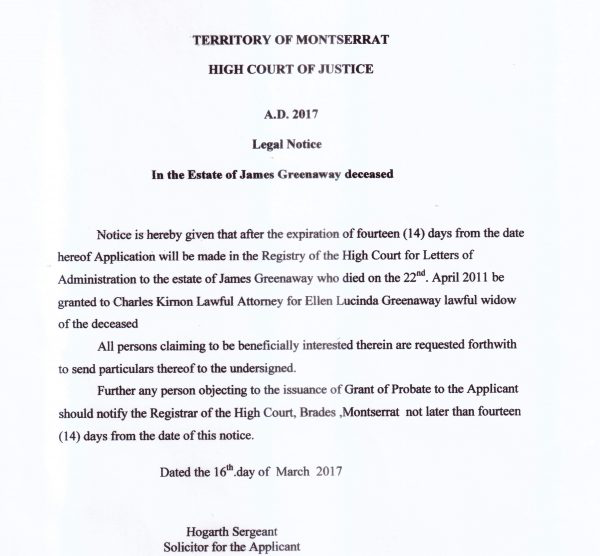

In [6]:
engimg

In [7]:
print(engtext)

‘TERRITORY OF MONTSERRAT

HIGH COURT OF JUSTICE

A.D. 2017
Legal Notice

In the Estate of James Greenaway deceased

Notice is hereby given that after the expiration of fourteen (14) days from the date
hereof Application will be made in the Registry of the High Court for Letters of
Administration to the estate of James Greenaway who died on the 22". April 2011 be
granted to Charles Kimon Lawful Attomey for Ellen Lucinda Greenaway lawful widow
of the deceased

{All persons claiming to be beneficially interested therein are requested forthwith
to send particulars thereof to the undersigned.

Further any person objecting to the issuance of Grant of Probate to the Applicant
should notify the Registrar of the High Court, Brades Montserrat not later than fourteen
(14) days from the date ofthis notice.

Dated the 16".day of March 2017

Hogarth Sergeant
Solicitor for the Applicant



In [9]:
# Install dependencies
# install pytorch
#comment out code below to insatll pytorch
#pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [11]:
# install transformers
#pip install transformers

In [12]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

In [15]:
# create tokenizer
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")

In [16]:
#load model
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

In [17]:
tokens = tokenizer(engtext, truncation = True, padding = "longest", return_tensors = "pt")
tokens

{'input_ids': tensor([[  402, 17144, 18013, 57913,  2793, 62124, 55043, 47036, 23342, 69387,
          2793, 22934, 19752,   202,   107,   470,   107,  1326,  6797, 10000,
           222,   109,  4411,   113,  2133,  1876,  9633, 12620, 10000,   117,
         18310,   634,   120,   244,   109, 16824,   113, 19734, 60071,   390,
           135,   109,   796,   264,  1313,  5649,   138,   129,   266,   115,
           109, 18872,   113,   109,  1186,  1975,   118, 15139,   113,  4396,
           112,   109,  1432,   113,  2133,  1876,  9633,   170,  2342,   124,
           109, 45897,   107,   960,  2651,   129,  4571,   112,  4154,  5377,
           661,  2144,  4717,   654,   497, 44467,   118, 13652, 70884,  1876,
          9633, 22534, 20343,   113,   109, 12620,   110,   105,  1199,  4438,
          8085,   112,   129,  3762,   445,  1161, 28376,   127,  4283,  5381,
          3030,   112,  1053,   970,   116, 14789,   112,   109, 73580,   107,
          7236,   189,   465,  2951,  

In [18]:
summary = model.generate(**tokens)


D:\anaconda\lib\site-packages\transformers\generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [19]:
summary[0]

tensor([    0, 10000,   117, 18310,   634,   120,   142,   723,   138,   129,
          266,   115,   109, 18872,   113,   109,  1186,  1975,   118, 15139,
          113,  4396,   112,   109,  1432,   113,  2133,  1876,  9633,   170,
         2342,   124,   109, 45897,   107,     1])

In [20]:
# decoding summary
final_summary=tokenizer.decode(summary[0])

In [21]:
print(final_summary)

Notice is hereby given that an application will be made in the Registry of the High Court for Letters of Administration to the estate of James Greenaway who died on the 22".


In [22]:
from englisttohindi.englisttohindi import EngtoHindi

In [23]:
hindi_summary = EngtoHindi(final_summary)
 
# displaying the translation
print(hindi_summary.convert)

नोटिस एतदद्वारा दिया जाता है कि जेम्स ग्रीनवे की संपत्ति के प्रशासन के पत्रों के लिए उच्च न्यायालय की रजिस्ट्री में एक आवेदन किया जाएगा, जिनकी मृत्यु 22 को हुई थी।
